# 분류 알고리즘
---
## K-NN
- 과거의 데이터를 기억하고 새로운 데이터에 대해서 가장 가까운 유사도(거리)를 가진 기존 데이터에 따라서 분류
- 비선형 모델
- Y가 범주형일 때 사용
- Y가 연속형인 경우 가장 가까운 데이터의 평균으로 새로운 데이터를 예측(평균이 가장 정확)
- k가 1인 경우는 과대적합 발생
- k가 클 수록 결정경계가 완만해지지만 과소적합 발생


K값 정하는 법
- 학습 error와 테스트 error가 최소가 되는 k값을 찾아야 함

<br/>

> 거리 계산(두 점 사이 거리)
> - 유클리드 거리 : 일반적으로 사용하는 피타고라스의 거리와 같은 거리 측정법
> - 맨하탄 거리 : 삼각형에서 ㄱ에 해당하는 거리를 더하는 측정법
> - Norm(놈) : 벡터의 길이, 크기를 측정하는 방법


In [108]:
# citrus : orange와 grapefruit을 분류하는 것이 목표
# binary분류

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [110]:
# 데이터 읽기
citrus = pd.read_csv('./dataset/citrus.csv')
citrus.shape

(10000, 6)

In [111]:
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [112]:
# 타겟 데이터 데이터 확인
citrus.name.unique()

array(['orange', 'grapefruit'], dtype=object)

In [113]:
# 타겟 데이터의 데이터 개수 확인
citrus.name.value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [114]:
citrus.info()  # name 데이터 인코딩 해줘야 함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [115]:
# 결측치 확인
citrus.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [116]:
# 중복 확인
citrus[citrus.duplicated()]  # 중복 데이터가 없는 거 확인

,name,diameter,weight,red,green,blue


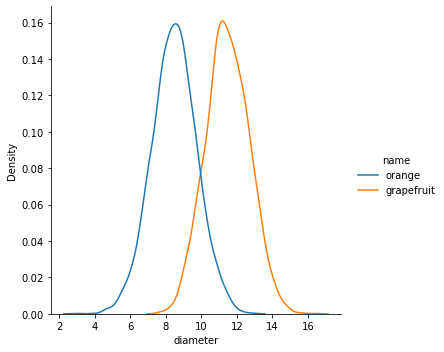

In [117]:
# 시각화
sns.displot(data=citrus, x = 'diameter', hue='name', kind='kde')  # kde : 선그래프로 표현
plt.show()

### 데이터 전처리
---

In [118]:
df = citrus.copy()
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


####  1) 레이블 인코딩
- map 
- label 인코딩
---

#### map 방법

In [119]:
# df['name'] = df['name'].map({'orange':1, 'grapefruit':0})

In [120]:
# df.head()


#### label 인코딩 방법

In [121]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()   # 객체 생성
le.fit(df['name'])   # fit:학습/전처리

df['name'] = le.transform(df['name'])   # 데이터 실제로 변환


# df['name'] = le.fit_transform(df['name'])  # fit과 transform을 같이 수행

df.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


In [122]:
le.classes_  # 변환 전 값 확인

array(['grapefruit', 'orange'], dtype=object)

In [123]:
# 참고) inverse_transform : 숫자에서 인덱스로 변환

#### 2) 데이터 분리 - 학습 데이터 / 테스트 데이터
---

In [124]:
# x, y 분리

X = df.iloc[:, 1:]  # 모든 row, name을 제외한 모든 column 가져오기
X     # 독립변수

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [125]:
y = df.iloc[:,0]
y    # 종속변수

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: name, Length: 10000, dtype: int32

1. 슬라이싱 방법
2. train_test_split

In [126]:
# # 학습 / 테스트 분리

# # 1. 슬라이싱 방법
# X, y = sklearn.utils.shuffle(X,y)   # 데이터 셔플

# idx = int(df.shape[0] * 0.8)

# X_train = X.iloc[:idx, :]  
# X_test = X.iloc[idx:,:]
# y_train = y[:idx]
# y_test = y[idx:]

In [127]:
# X_train.shape, X_test.shape

In [128]:
# y_train.shape, y_test.shape

In [129]:
# # 데이터가 분리될 때 sort되어있는 데이터의 경우 데이터가 불균형하게 분리될 수 있음
# y_train.value_counts()  

In [130]:
# # 1. 슬라이싱 방법
# X, y = sklearn.utils.shuffle(X,y)   # 데이터 셔플 과정 추가

# idx = int(df.shape[0] * 0.8)

# X_train = X.iloc[:idx, :]  
# X_test = X.iloc[idx:,:]
# y_train = y[:idx]
# y_test = y[idx:]


In [131]:
# y_train.value_counts()

In [132]:
# 2. train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2022, stratify=y, shuffle=True)  # stratify : 훈련/테스트에 값이 균일하게 넣어줌

In [133]:
X_train.shape, X_test.shape

((8000, 5), (2000, 5))

#### 3) 스케일링
- 표준화 : 해당 컬럼의 평균과 표준편차를 0과 1로 만듦
---

In [134]:
# # 1. 표준화 과정
# m = X_train['diameter'].mean()
# s = X_train['diameter'].std()

# z = (X_train['diameter']-m) / s

In [135]:
# 1. 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() 
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)   # 스케일링 진행, array 형식으로 출력됨
type(X_train_scaled)

numpy.ndarray

In [136]:
X_train_scaled[:5]  # 표준화 결과 확인

array([[-1.61852607, -1.60693378,  0.48456216,  1.45730586, -0.92140149],
       [-0.59932084, -0.75195291, -1.42739703, -1.02134167, -0.81169288],
       [-1.31122801, -1.31556395,  0.00657236,  0.00430558,  0.39510185],
       [ 0.35330314,  0.32573973,  1.15374787,  1.02995284,  0.8339363 ],
       [-2.12044623, -2.05508996, -0.18462356,  0.68807042,  0.61451907]])

In [137]:
y_train = y_train.to_numpy()   # y_train도 넘파이 형태로 변환

type(y_train)

numpy.ndarray

### 모델 학습
---

In [138]:
# 학습
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()  
# clf = KNeighborsClassifier(n_neighbors=6)   # k의 개수를 튜닝할 수 있음, 디폴트는 5
clf.fit(X_train_scaled, y_train)  # 지도학습에는 스케일링 된 feature와 정답 데이터 모두 넣어줘야 함

KNeighborsClassifier()

### 테스트 
---

In [139]:
X_test_scaled = ss.transform(X_test)
X_test_scaled[:5]

array([[-0.45079345, -0.43701389,  3.25690297,  0.17524679, -0.81169288],
       [-0.04618434, -0.08176814,  0.3889642 , -0.08116502, -0.48256704],
       [ 0.50695217,  0.50062995, -0.0890256 ,  0.4316586 ,  0.61451907],
       [ 0.88595311,  0.90164774, -1.04500519, -0.85040046,  0.17568463],
       [-0.90149727, -0.89917494,  0.67575807, -0.16663563,  0.17568463]])

In [140]:
# 예측값
y_pred = clf.predict(X_test_scaled)

In [141]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [143]:
# 정확도
(y_pred == y_test).sum() / X_test.shape[0]

0.9205

### 평가
---

In [144]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)   # (정답값, 예측값)
cfm

array([[915,  85],
       [ 74, 926]], dtype=int64)

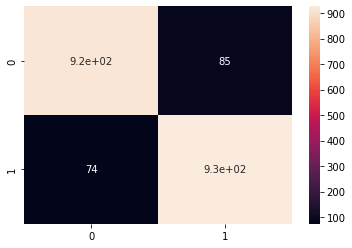

In [146]:
plt.figure(figsize=(6,4))
sns.heatmap(cfm, annot=True)
plt.show()

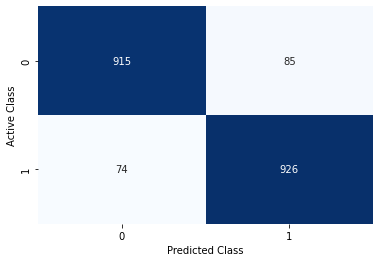

In [151]:
plt.figure(figsize=(6,4))
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='Blues')  # fmt : 포멧을 int형으로 설정
plt.ylabel('Active Class')
plt.xlabel('Predicted Class')
plt.show()

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'정확도 : {accuracy_score(y_test, y_pred)}') 
print(f'정밀도 : {precision_score(y_test, y_pred)}')
print(f'재현율 : {recall_score(y_test, y_pred)}') 

정확도 : 0.9205
정밀도 : 0.9159248269040554
재현율 : 0.926


### 최적의 k값 찾기

In [182]:
# 최적의 k값 찾기

# # X_train 스케일링
# X_train_scaled = ss.transform(X_train)   # 스케일링 진행, array 형식으로 출력됨

# # X_test 스케일링 
# X_test_scaled = ss.transform(X_test)

acc_scores = []
for k in range(3,30):
    clf1 = KNeighborsClassifier(n_neighbors = k)
    clf1.fit(X_train_scaled, y_train)
    
    y_pred = clf1.predict(X_test_scaled)
    acc_scores.append(accuracy_score(y_test, y_pred))
    

In [176]:
np.argmax(acc_scores)  # 최대값 인덱스 출력

28

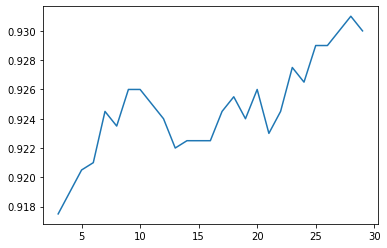

In [189]:
plt.plot(range(3,30), acc_scores)
plt.show()

### 교차 검증
- K-Fold
---

In [191]:
X_train_scaled.shape  

(8000, 5)

In [198]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=2022)  # n_splits : 8000개를 다섯 개로 나눔
acc_scores=[]
for train_idx, val_idx in kf.split(X_train_scaled):
    train_x, val_x = X_train_scaled[train_idx], X_train_scaled[val_idx]
    train_y, val_y = y_train[train_idx], y_train[val_idx]
    
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(train_x, train_y)
    y_pred = model.predict(val_x)
    acc_scores.append(accuracy_score(val_y, y_pred))
    

print(f' 정확도 : {np.array(acc_scores).mean()}')

 정확도 : 0.9193749999999999


In [203]:
kf = KFold(n_splits=5, shuffle=True, random_state=2022)  # n_splits : 8000개를 다섯 개로 나눔
acc_scores=[]
for train_idx, val_idx in kf.split(X_train_scaled):
    train_x, val_x = X_train_scaled[train_idx], X_train_scaled[val_idx]
    train_y, val_y = y_train[train_idx], y_train[val_idx]
    
    
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(train_x, train_y)
    y_pred = model.predict(val_x)
    acc_scores.append(accuracy_score(val_y, y_pred))
    
np.argmax(acc_scores)

2

In [205]:
from sklearn.model_selection import KFold
hist = []
for k in range(3,50):
    kf = KFold(n_splits=5, shuffle=True, random_state=2022)  # n_splits : 8000개를 다섯 개로 나눔
    acc_scores=[]
    
    for train_idx, val_idx in kf.split(X_train_scaled):
        train_x, val_x = X_train_scaled[train_idx], X_train_scaled[val_idx]
        train_y, val_y = y_train[train_idx], y_train[val_idx]
        
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_x, train_y)
        y_pred = model.predict(val_x)
        acc_scores.append(accuracy_score(val_y, y_pred))
    
    hist.append(np.array(acc_scores).mean())


In [ ]:
# pip install tqdm   # 어느정도 진행되고 있는지 확인
# from tqdm import tqdm

# for k in tqdm(range(3,50)):
#     ...

In [206]:
# cross_val_score으로 위 코드 구현

from sklearn.model_selection import cross_val_score

hist = []

for k in range(3,50):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    hist.append(scores.mean())

In [207]:
np.argmax(hist)

39